In [ ]:
#---- for high-quality plots
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 196

## 挿入用のコード

In [2]:
#---- ch06/import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#---- ch06/function-1
def f(x):
    return x ** 3 - 10 * x

In [4]:
#---- ch06/function-2
f(3)
f(-4)

-24

In [5]:
#---- ch06/function-3
a = np.array([1, 2, 3])
f(a)

array([ -9, -12,  -3])

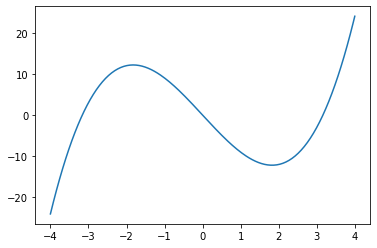

In [6]:
#---- ch06/function-np/plot
x = np.linspace(-4, 4, 200)
plt.plot(x, f(x))
plt.show()

In [7]:
#---- ch06/define-multivar-func
def cd(x, y):
    alpha = 0.3
    return x**alpha * y**(1 - alpha)

In [8]:
#---- ch06/use-multivar-func-1
cd(2, 3)

2.6564024798866686

In [9]:
#---- ch06/one-line
def digits(x): return np.ceil(np.log10(x + 1))

digits(np.array([102, 2020, 155550]))

array([3., 4., 6.])

#### ラムダ式

In [10]:
#---- ch06/simple-lambda
digits2 = lambda x: np.ceil(np.log10(x + 1))
digits2(993)

3.0

In [11]:
#---- ch06/pandas-apply
x = pd.DataFrame(np.arange(12).reshape(4, 3), columns=list("ABC"))
x.apply(lambda x: x ** 2)

,A,B,C
0,0,1,4
1,9,16,25
2,36,49,64
3,81,100,121


### 引数に関するテクニック

#### 位置引数とキーワード引数

In [12]:
#---- ch06/use-multivar-func-2
cd(x=2, y=3)

2.6564024798866686

In [13]:
#---- ch06/use-multivar-func-3
cd(y=3, x=2)

2.6564024798866686

In [14]:
#---- ch06/use-multivar-ok
cd(2, y=3)

2.6564024798866686

#### オプション引数

In [15]:
#---- ch06/optional-argument
def production(k, l, a=1):
    alpha = 0.3
    return a * k**alpha * l**(1 - alpha)

In [16]:
#---- ch06/optional-argument-1
production(2, 3)

2.6564024798866686

In [17]:
#---- ch06/optional-argument-2
production(2, 3, 2)

5.312804959773337

#### * と **

In [18]:
#---- ch06/arbitrary-number
def number_of_args(*args):
    return len(args)

number_of_args("First", 2, [3, 2, 1], "End")

4

In [19]:
#---- ch06/kwargs
def show_arguments(**kwargs):
    return kwargs

show_arguments(x=1, y=2, z=[1, 2])

{'x': 1, 'y': 2, 'z': [1, 2]}

In [20]:
#---- ch06/star-both
def function(*args, **kwargs):
    return (args, kwargs)

function("x", "y", a=1, b=2, c=3)

(('x', 'y'), {'a': 1, 'b': 2, 'c': 3})

In [21]:
#---- ch06/call-with-star
xy = (2, 3)
cd(*xy)

2.6564024798866686

In [22]:
#---- ch06/call-with-2stars
xydict = {'x': 2, 'y': 3}
cd(**xydict)

2.6564024798866686

### 副作用

In [23]:
#---- ch06/function-print
def g(x):
    print(x)
    print("Doubling...")
    return 2 * x

g(3)

3
Doubling...


6

In [24]:
#---- ch06/change-copy-hopefully
def double_1st_elem(x):
    y = x
    y[0] = 2 * x[0]
    return y

x = [1, 2, 3]
double_1st_elem(x)

[2, 2, 3]

In [25]:
#---- ch06/check-x
x

[2, 2, 3]

In [26]:
#---- ch06/change-copy-really
def double_1st(x):
    y = x[:]
    y[0] = 2 * x[0]
    return y

x = [1, 2, 3]
double_1st(x)
x

[1, 2, 3]

### 関数のスコープ

In [27]:
#---- ch06/scope
a = 3                # (1) a==3

def fun(x):
    a = 0            # (2) a==0
    return x + a

print(fun(0))        # (3) a==0
print(a)             # (4) a==3

0
3


In [28]:
#---- ch06/scope2
b = 3
def fun2(x):
    y = b
    return x + y

fun2(3)

6

### 高階関数

In [29]:
#---- ch06/cobb-doublas-factory
def cd_factory(a):
    def F(K, L, A):
        return K**a * (A * L)**(1 - a)
    return F

cobb_douglas = cd_factory(0.33)
cobb_douglas(2, 3, 1)

2.624285852902312

In [30]:
#---- ch06/recursive-formula
def makeG(a, b):
    def G(y):
        return a * y + b
    return G

In [31]:
#---- ch06/recursive-formula-simulate
def simulate(update_rule, y0, T):
    y0 = np.asarray(y0)
    y = np.empty((T, *y0.shape))
    y[0] = y0
    for t in range(1, T):
        y[t] = update_rule(y[t-1])
    return y

G = makeG(a=0.6, b=1)
simulate(G, y0=10, T=20)

array([10.        ,  7.        ,  5.2       ,  4.12      ,  3.472     ,
        3.0832    ,  2.84992   ,  2.709952  ,  2.6259712 ,  2.57558272,
        2.54534963,  2.52720978,  2.51632587,  2.50979552,  2.50587731,
        2.50352639,  2.50211583,  2.5012695 ,  2.5007617 ,  2.50045702])

In [32]:
#---- ch06/randomize
def randomize(g, random):
    def randomized(*args, **kwargs):
        return g(*args, **kwargs) + random()
    return randomized

rng = np.random.default_rng(123)
Ge = randomize(G, random=rng.normal)
simulate(Ge, y0=10, T=20)

array([10.        ,  6.01087865,  4.23874054,  4.83116958,  4.09267617,
        4.3758366 ,  4.20260575,  2.8850998 ,  3.2730121 ,  2.64721181,
        2.26593797,  2.4567301 ,  0.94810765,  2.7610307 ,  1.98552874,
        3.19158667,  3.05127312,  4.36279695,  2.95770876,  2.4628304 ])

## ソロー・モデル

In [33]:
#---- ch06/solow-model
def solow(s, delta, g, n, F):
    def solow_g(x):
        K0, L0, A0 = x
        K1 = s * F(K0, L0, A0) + (1 - delta) * K0
        L1 = (1 + n) * L0
        A1 = (1 + g) * A0
        return np.array([K1, L1, A1])
    return solow_g

In [34]:
#---- c06/set-parameters
params = {'s': 0.3,
          'delta': 0.05,
          'g': 0.03,
          'n': 0.01,
          'F': cd_factory(0.33)}

G = solow(**params)

In [35]:
#---- ch06/simulate-solow
sol = pd.DataFrame(simulate(G, [2, 1, 1], 100), 
                   columns=['K', 'L', 'A'])
sol.tail(5)

,K,L,A
95,255.371753,2.573538,16.578161
96,265.704289,2.599273,17.075506
97,276.452398,2.625266,17.587771
98,287.632845,2.651518,18.115404
99,299.263070,2.678033,18.658866


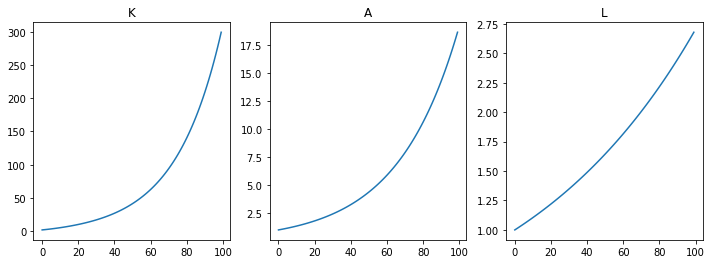

In [36]:
#---- ch06/simulate-solow/plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for var, ax in zip(['K', 'A', 'L'], axes):
    sol[var].plot(ax=ax, title=var)

plt.show()

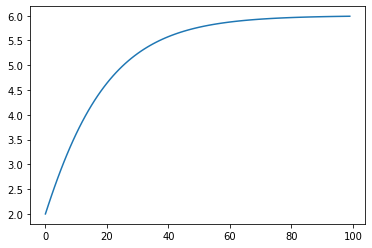

In [37]:
#---- ch06/small-k/plot
fig, ax = plt.subplots()

sol['k'] = sol.K / sol.A / sol.L
sol.k.plot(ax=ax)
plt.show()

In [38]:
#---- ch06/saving-change-initial-params
params = {'s': 0.2,
          'delta': 0.05,
          'g': 0.03,
          'n': 0.01,
          'F': cd_factory(0.33)}

G = solow(**params)
T = 20
initial = [6, 1, 1]

In [39]:
#---- ch6/saving-change-helper
def computeYC(frame):
    frame['Y'] = params['F'](frame.K, frame.L, frame.A)
    frame['C'] = (1 - params['s']) * frame.Y
    return frame

In [40]:
#---- ch06/saving-no-change
nochange = pd.DataFrame(simulate(G, initial, 3*T),
                        columns=['K', 'L', 'A'],
                        index=range(3*T))
nochange = computeYC(nochange)

In [41]:
#---- ch06/saving-before
before = pd.DataFrame(simulate(G, initial, T), 
                      columns=['K', 'L', 'A'],
                      index=range(T))
before = computeYC(before)
before.tail()

,K,L,A,Y,C
15,7.806981,1.160969,1.557967,2.930646,2.344517
16,8.002761,1.172579,1.604706,3.033956,2.427165
17,8.209414,1.184304,1.652848,3.141662,2.513330
18,8.427276,1.196147,1.702433,3.253940,2.603152
19,8.656700,1.208109,1.753506,3.370973,2.696778


In [42]:
#---- ch06/saving-change-new-param
params['s'] = 0.3
G_new = solow(**params)
new_initial = before.iloc[-1, :3].to_numpy()

In [43]:
#---- ch06/saving-after
after = pd.DataFrame(simulate(G_new, new_initial, 2 * T + 1), 
                     columns=['K', 'L', 'A'],
                     index=range(T-1, 3*T))
after = computeYC(after)
saving_increased = pd.concat([before, after.iloc[1:]])

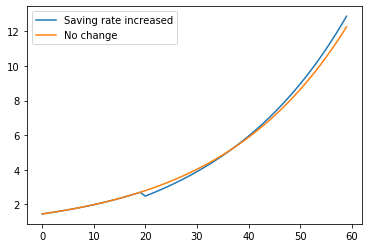

In [44]:
#---- ch06/saving-change/plot
saving_increased.C.plot()
nochange.C.plot();
plt.legend(['Saving rate increased', 'No change'])
plt.show()